In [ ]:
!pip install langdetect

In [ ]:
!pip install indic-nlp-library

In [ ]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from langdetect import detect

In [ ]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('indian')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package indian to /root/nltk_data...
[nltk_data]   Package indian is already up-to-date!


True

In [ ]:
# Load the dataset from a CSV file
file_path = '/content/constraint_Hindi_Train - Sheet1.csv'
df = pd.read_csv(file_path)

In [ ]:
import re

stopwords_hindi = ['तुम','गई', 'दी', 'क्या', 'मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं', 'नेहरू', 'लेते', 'कटाक्ष', 'जय', 'शी', 'अगर', 'मास्टर', 'वो', 'सिगरेट', 'बीवी', 'इश्क़', 'किताब', 'वश', 'पटाकर', 'पिलाकर']

def preprocess_text(text):
    # Remove emojis and special characters except Hindi characters
    text = re.sub(r'[^\w\s।\u0900-\u097F]', '', text)

    # Remove '@', '#' and other symbols
    text = re.sub(r'[#@।_]', '', text)

    text = text.lower()

    # Remove English words and numbers
    text = re.sub(r'[a-zA-Z0-9]+', '', text)

    words = text.split()
    filtered_words = [word for word in words if word not in stopwords_hindi]
    return ' '.join(filtered_words)

In [ ]:
# Apply preprocessing to each row in the DataFrame
df['Preprocessed_Text'] = df['Post'].apply(preprocess_text)

# Save the preprocessed data to a new CSV file
preprocessed_file_path = '/content/constraint_Hindi_Train - Sheet1.csv'

df.to_csv(preprocessed_file_path, index=False)

# Display the first few rows of the preprocessed DataFrame
print(df.head())

   Unique ID                                               Post  \
0          1  मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...   
1          2  सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...   
2          3  सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...   
3          4  @prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...   
4          5  #unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...   

             Labels Set                                  Preprocessed_Text  
0        hate,offensive     देश हिन्दु निराले पक्के राम भक्त बाबर साले राम  
1           non-hostile  सरकार हमेशा किसानों कमाई बढ़ाने नईनई स्कीमें ल...  
2           non-hostile  सुशांत बिजनेस डील जून डील दीपेश सुशांत हत्या द...  
3  defamation,offensive  साले जेएनयू छाप कमिने लोग हिन्दुओं संविधान सबक...  
4           non-hostile  अनलॉक गाइडलाइन्स जारी सितंबर देशभर मेट्रो सेवा...  


In [ ]:
# Tokenization
from indicnlp.tokenize import indic_tokenize

def tokenization(indic_string):
    tokens = []
    for t in indic_tokenize.trivial_tokenize(indic_string):
        tokens.append(t)
    return tokens

In [ ]:
# Apply tokenization to each row in the DataFrame
df['Preprocessed_Text'] = df['Preprocessed_Text'].apply(tokenization)

# Tokenized data to a new CSV file
tokenized_file_path = '/content/constraint_Hindi_Train - Sheet1.csv'

df.to_csv(tokenized_file_path, index=False)

# Display the first few rows of the tokenized DataFrame
print(df.head())

   Unique ID                                               Post  \
0          1  मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...   
1          2  सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...   
2          3  सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...   
3          4  @prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...   
4          5  #unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...   

             Labels Set                                  Preprocessed_Text  
0        hate,offensive  [देश, हिन्दु, निराले, पक्के, राम, भक्त, बाबर, ...  
1           non-hostile  [सरकार, हमेशा, किसानों, कमाई, बढ़ाने, नईनई, स्...  
2           non-hostile  [सुशांत, बिजनेस, डील, जून, डील, दीपेश, सुशांत,...  
3  defamation,offensive  [साले, जेएनयू, छाप, कमिने, लोग, हिन्दुओं, संवि...  
4           non-hostile  [अनलॉक, गाइडलाइन्स, जारी, सितंबर, देशभर, मेट्र...  


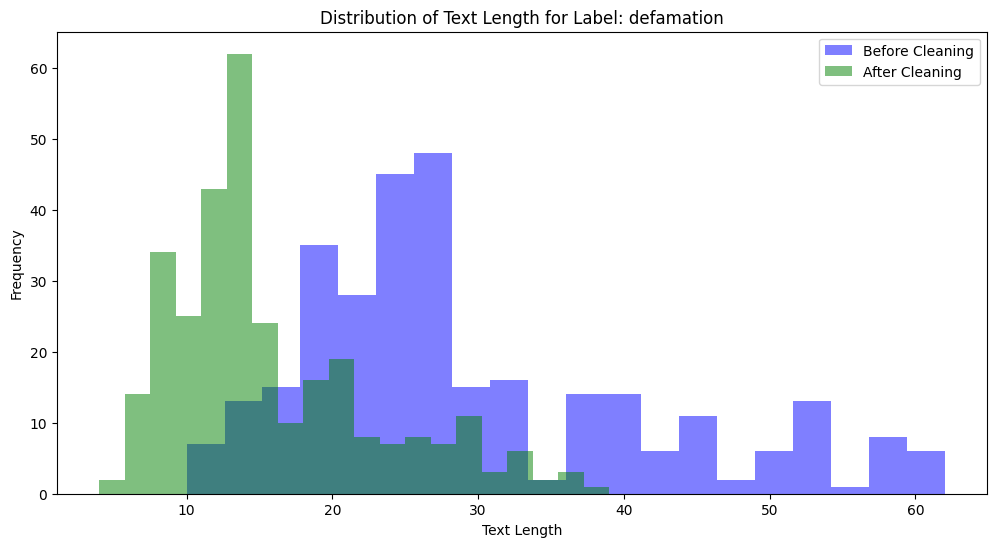

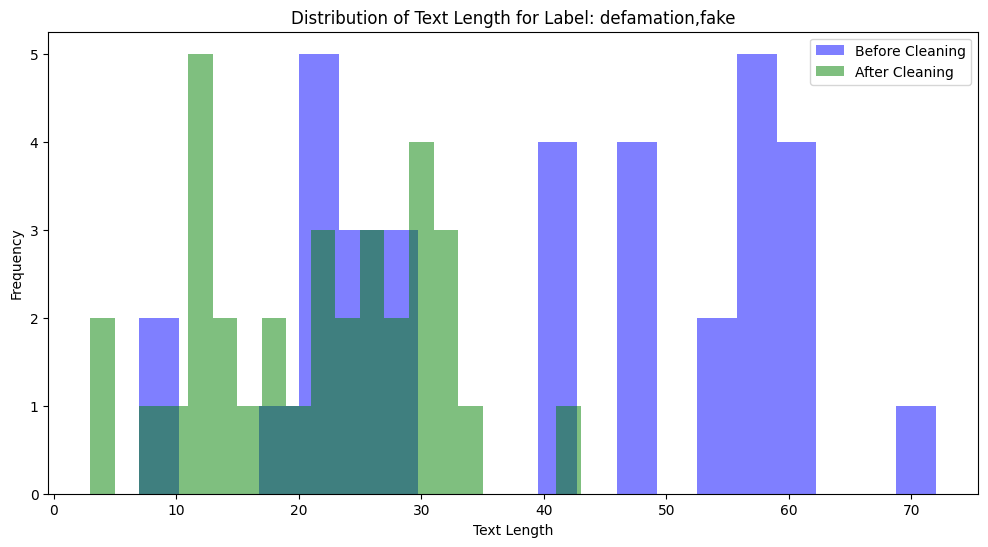

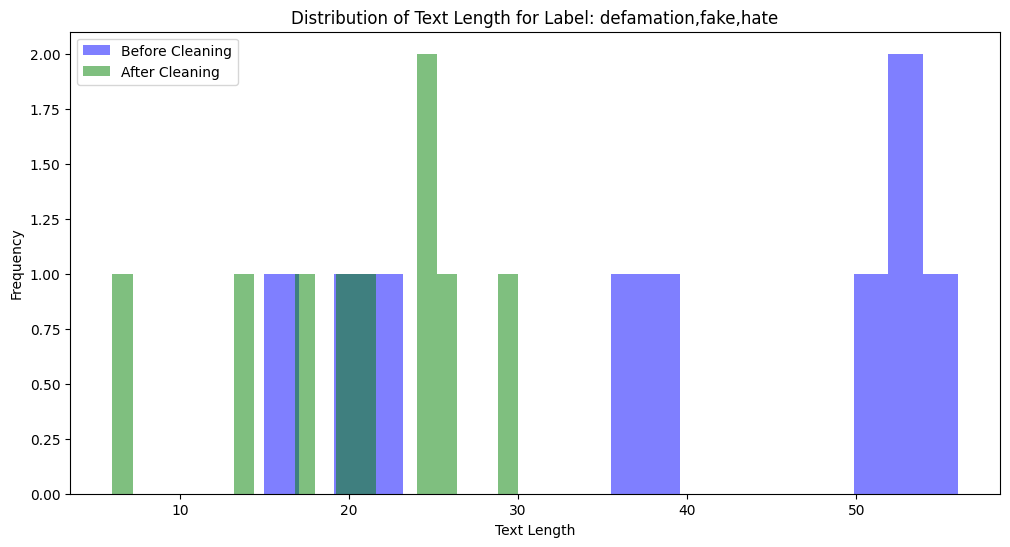

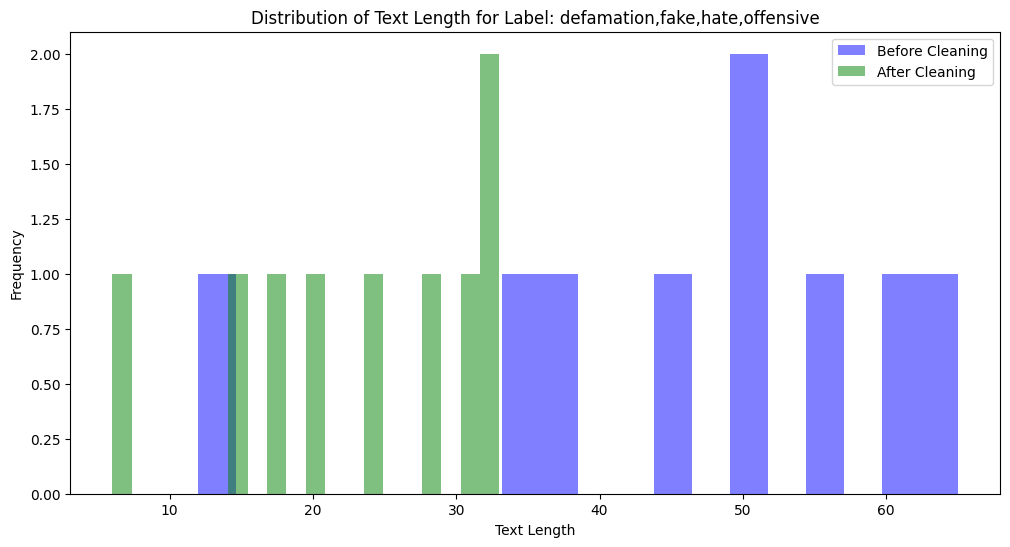

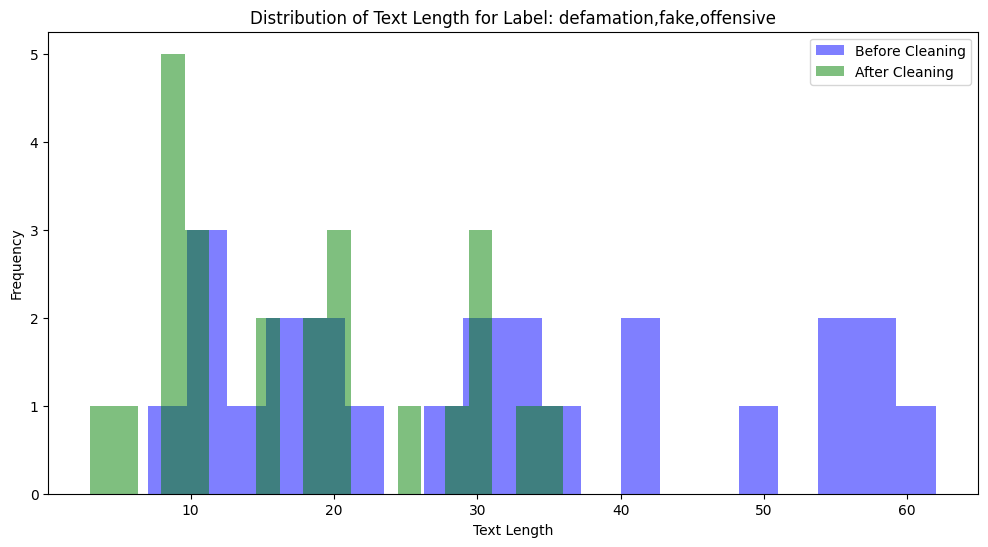

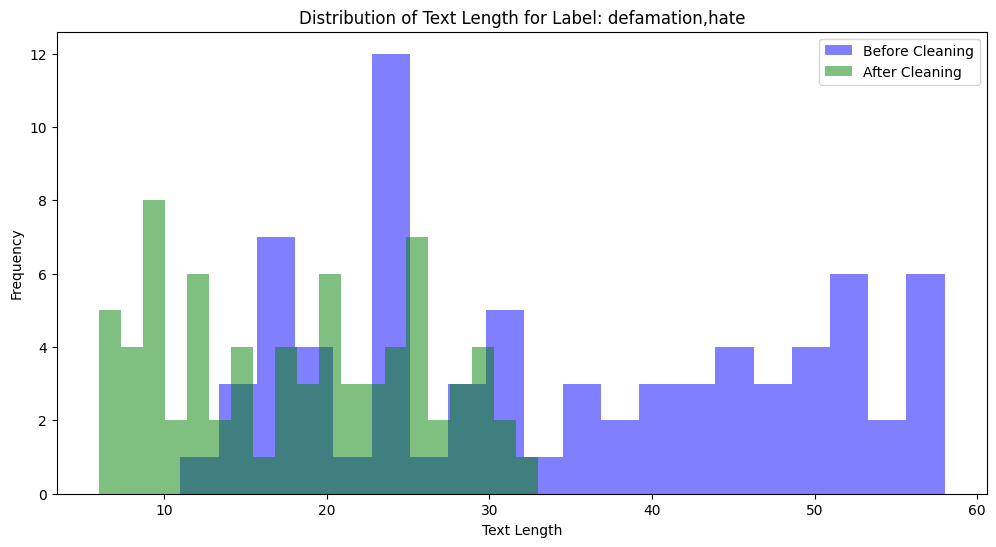

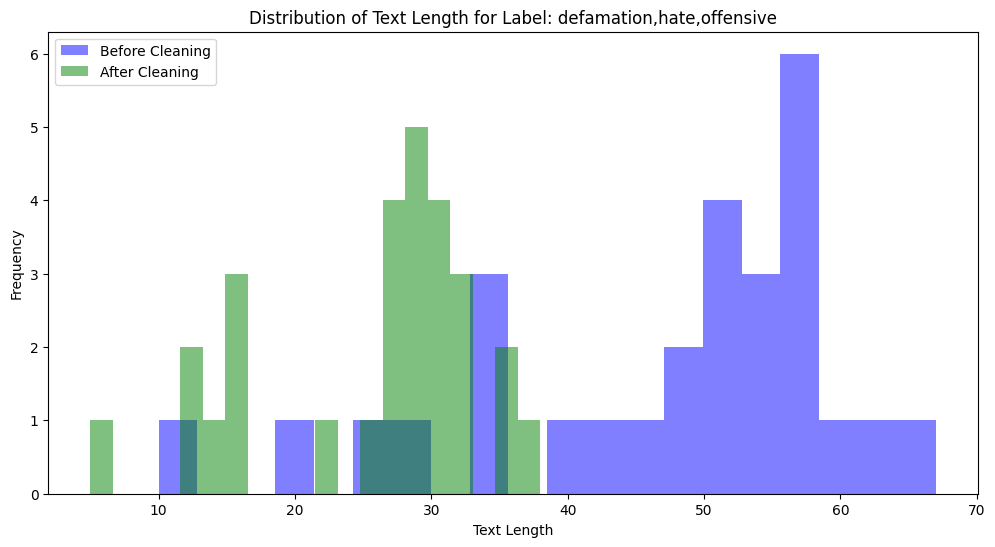

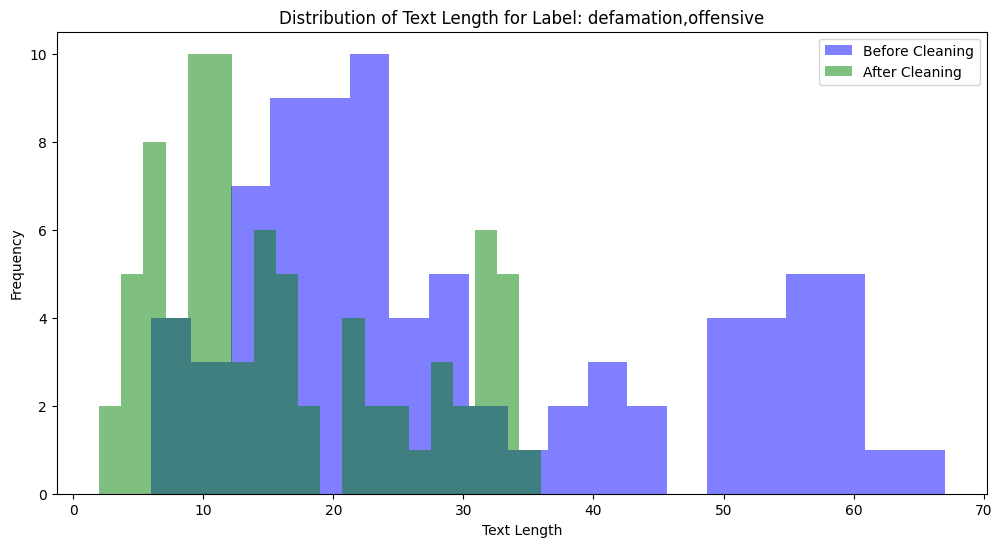

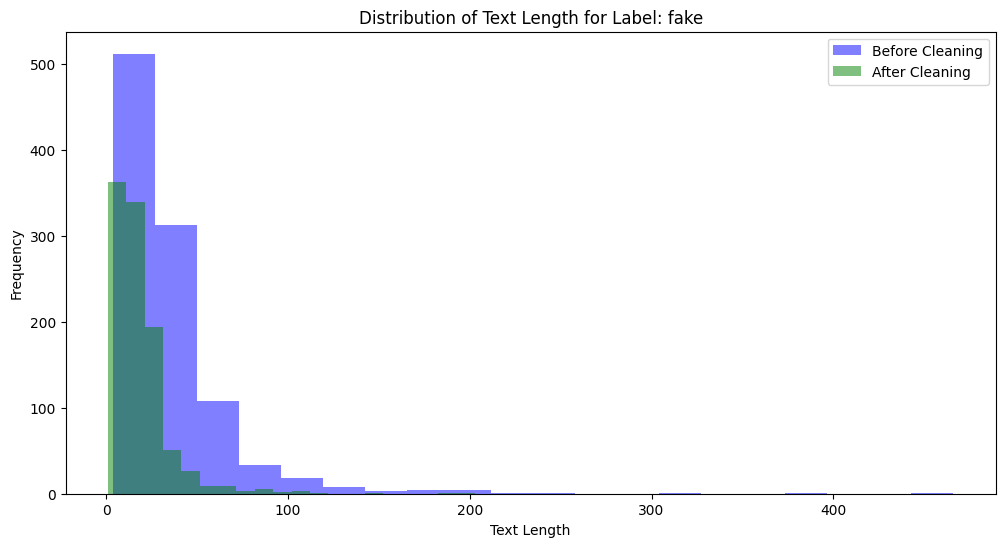

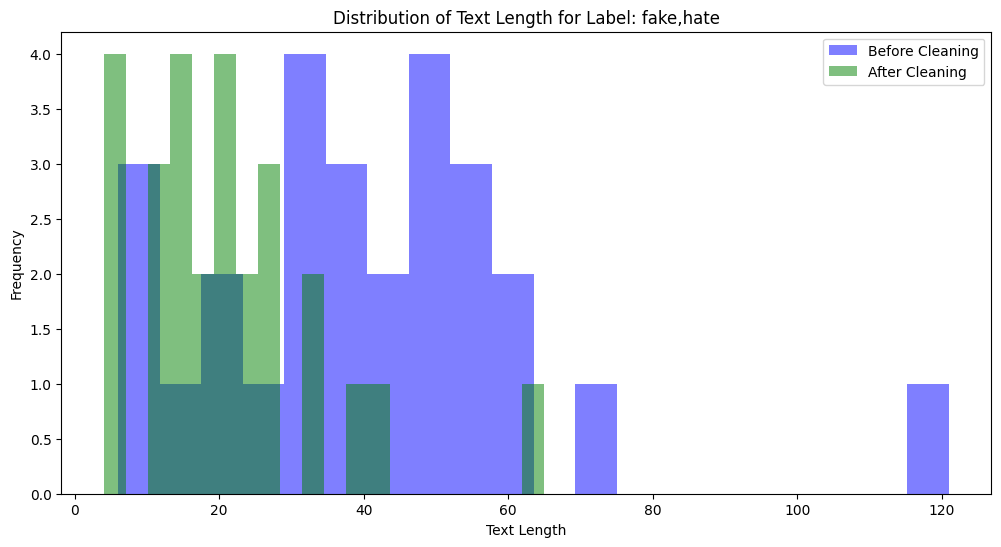

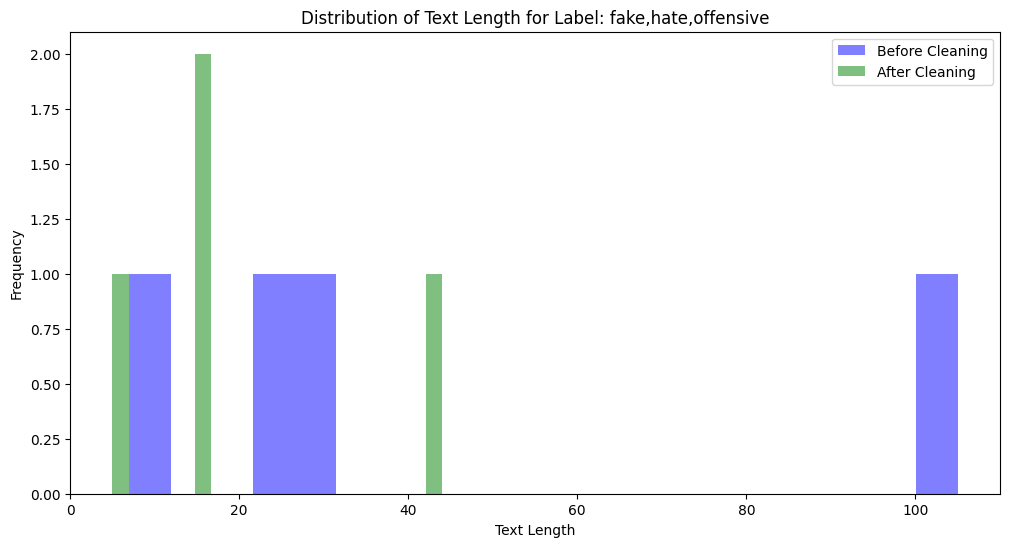

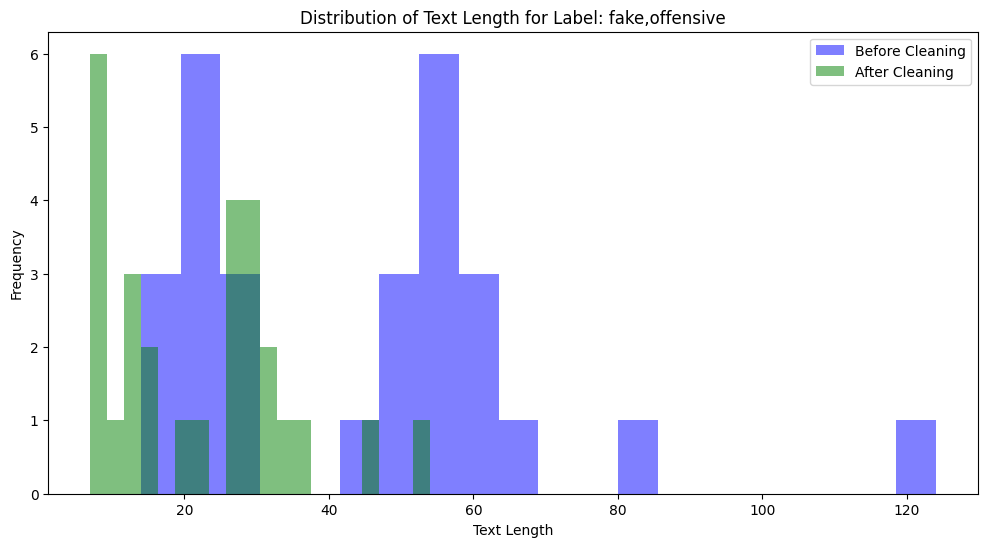

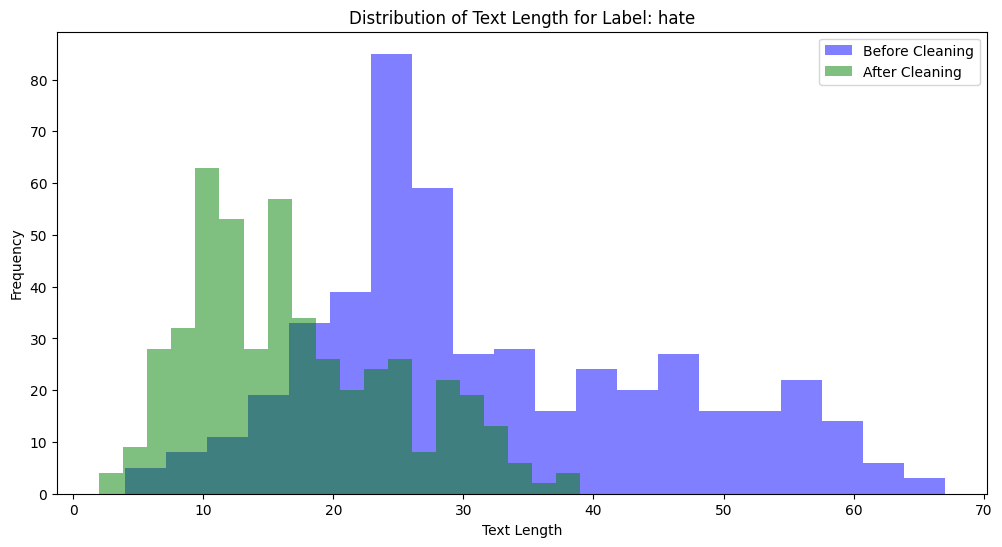

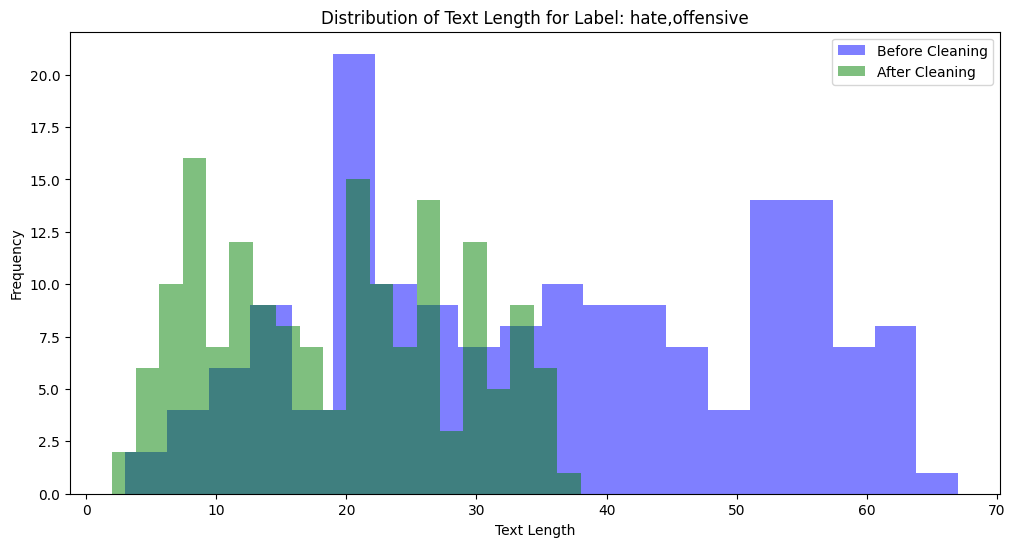

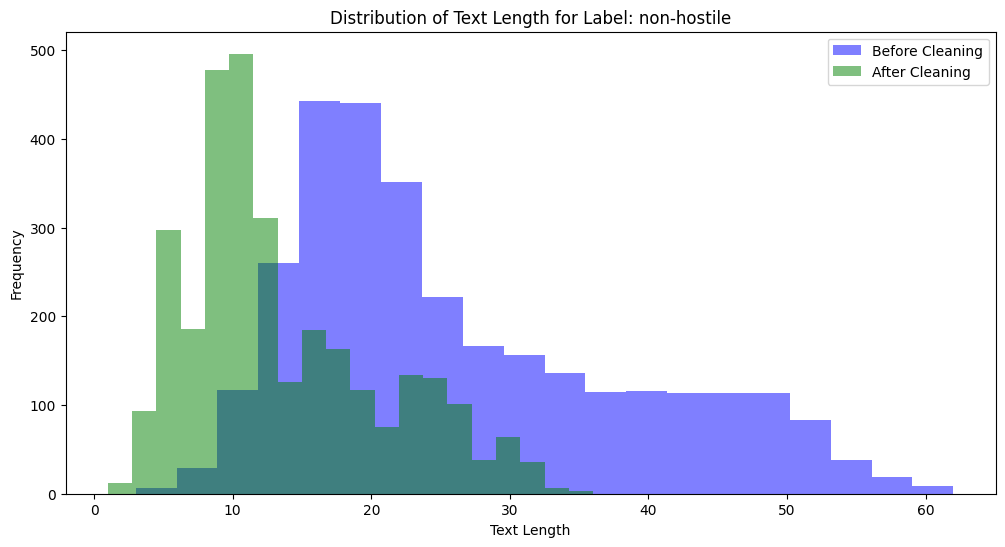

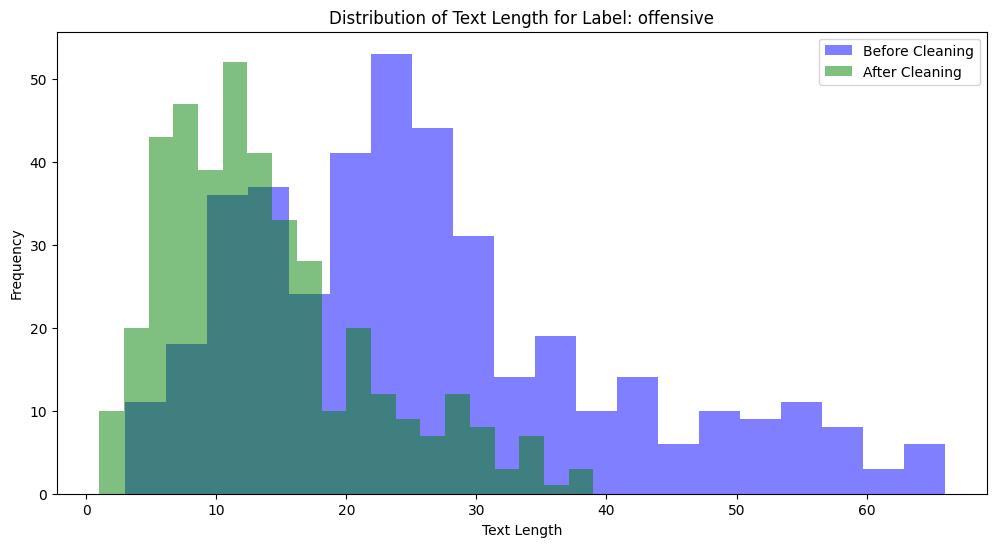

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your preprocessed dataset
df = pd.read_csv('constraint_Hindi_Train - Sheet1.csv')

# Function to calculate text length
def text_length(text):
    return len(text.split())

# Calculate text length before text cleaning and add it to a new column
df['Text_Length_Before'] = df['Post'].apply(text_length)

# Calculate text length after text cleaning and add it to a new column
df['Text_Length_After'] = df['Preprocessed_Text'].apply(text_length)

# Group data by label
grouped = df.groupby('Labels Set')

# Plot the distribution of text length for each label before and after text cleaning
for label, group in grouped:
    plt.figure(figsize=(12, 6))
    plt.hist(group['Text_Length_Before'], bins=20, alpha=0.5, label='Before Cleaning', color='b')
    plt.hist(group['Text_Length_After'], bins=20, alpha=0.5, label='After Cleaning', color='g')
    # number of words distributed within each label/ category
    plt.title(f'Distribution of Text Length for Label: {label}')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.font_manager import FontProperties
import requests
from nltk.probability import FreqDist

In [ ]:
from indicnlp.tokenize import indic_tokenize
tokenized_word = []

for text in df['Preprocessed_Text']:
    tokens = tokenization(text)
    tokenized_word.extend(tokens)

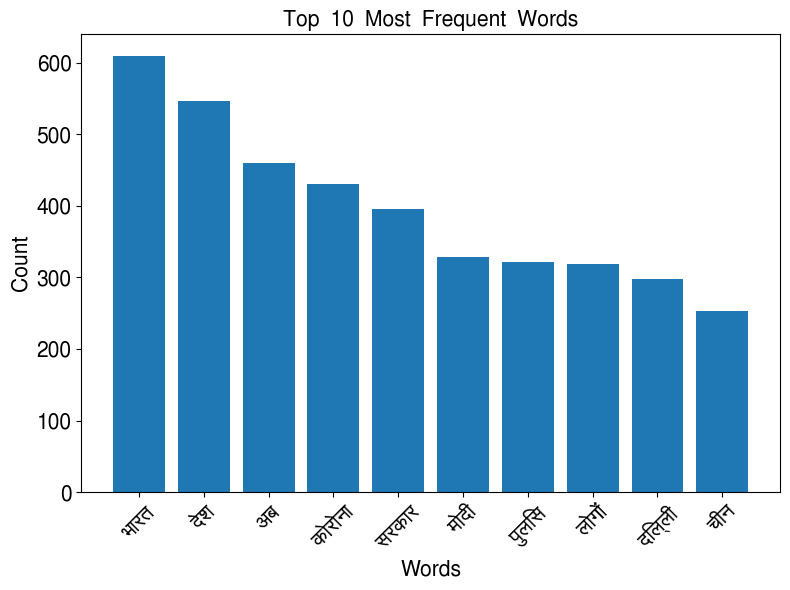

In [ ]:
# Calculate the frequency distribution
fdist = FreqDist(tokenized_word)
p = fdist.most_common(14)
p = dict(p)

# Exclude the top 4 words and take the next 10
top_words = list(p.keys())[4:14]
word_counts = [p[word] for word in top_words]

# Font properties for the Hindi characters
font_path = "gargi.ttf"
font_prop = FontProperties(fname=font_path, size=15)

# Create the bar graph
plt.figure(figsize=(8, 6))
ax = plt.subplot()
plt.bar(range(len(top_words)), word_counts, align='center')
plt.xticks(range(len(top_words)), top_words, rotation=45)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(15)
plt.title("Top 10 Most Frequent Words", fontproperties=font_prop, size=15)
plt.xlabel("Words", fontproperties=font_prop)
plt.ylabel("Count", fontproperties=font_prop)
plt.tight_layout()

# Display the bar graph
plt.show()

In [ ]:
# Displaying the top 5 to 14 words
for word, count in list(p.items())[4:14]:
    print(f"{word}: {count}")

भारत: 609
देश: 547
अब: 460
कोरोना: 430
सरकार: 395
मोदी: 328
पुलिस: 322
लोगों: 318
दिल्ली: 297
चीन: 253


In [ ]:
# Feature Extraction

In [ ]:
!pip install transformers

In [ ]:
!pip install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.1
    Uninstalling torch-2.1.1:
      Successfully uninstalled torch-2.1.1


In [ ]:
# !pip install torch==1.9.1+cpu torchvision==0.10.1+cpu torchaudio==0.9.1+cpu tokenizers==0.10.3 transformers==4.10.0

In [ ]:
# !pip install torch --upgrade
# !pip install transformers==4.10.0

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel

# Load pre-trained BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
model = AutoModel.from_pretrained("bert-base-multilingual-cased")

# Function to get BERT embeddings for a given text
def get_bert_embedding(text):
    # Tokenize the text
    tokens = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

    # Forward pass to get BERT embeddings
    with torch.no_grad():
        outputs = model(**tokens)

    # Extract the embeddings for the [CLS] token (representing the entire sequence)
    cls_embedding = outputs.last_hidden_state[:, 0, :].numpy()

    return cls_embedding

# Apply BERT feature extraction to each row in the DataFrame
df['BERT_Embedding'] = df['Preprocessed_Text'].apply(get_bert_embedding)

# Save the DataFrame with BERT embeddings to a new CSV file
bert_embedding_file_path = 'bert_embeddings.csv'
df.to_csv(bert_embedding_file_path, index=False)

# Display the first few rows of the DataFrame with BERT embeddings
print(df.head())

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

   Unique ID                                               Post  \
0          1  मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...   
1          2  सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...   
2          3  सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...   
3          4  @prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...   
4          5  #unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...   

             Labels Set                                  Preprocessed_Text  \
0        hate,offensive  ['देश', 'हिन्दु', 'निराले', 'पक्के', 'राम', 'भ...   
1           non-hostile  ['सरकार', 'हमेशा', 'किसानों', 'कमाई', 'बढ़ाने'...   
2           non-hostile  ['सुशांत', 'बिजनेस', 'डील', 'जून', 'डील', 'दीप...   
3  defamation,offensive  ['साले', 'जेएनयू', 'छाप', 'कमिने', 'लोग', 'हिन...   
4           non-hostile  ['अनलॉक', 'गाइडलाइन्स', 'जारी', 'सितंबर', 'देश...   

   Text_Length_Before  Text_Length_After  \
0                  24                  9   
1                  24                 14